# Forest Visualization

## Importing modules

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing

In [171]:
df = pd.read_csv('./forestfires.csv')

In [172]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,6,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Check for null values

In [173]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

[26.2, 35.4, 43.7, 33.3, 51.3, 85.3, 88.9, 145.4, 129.5, 88.0, 88.0, 73.2, 70.8, 126.5, 133.3, 141.2, 35.8, 32.8, 27.9, 27.4, 129.5, 78.5, 96.3, 110.9, 139.4, 142.4, 117.9, 126.5, 145.4, 149.3, 85.1, 91.8, 69.7, 75.6, 78.5, 80.7, 35.4, 41.5, 43.7, 25.7, 60.6, 96.9, 108.3, 88.0, 82.9, 85.1, 126.5, 62.3, 23.9, 52.2, 137.0, 99.6, 111.2, 111.2, 114.3, 137.0, 80.7, 46.5, 9.3, 13.2, 51.3, 51.3, 75.3, 99.6, 103.2, 114.3, 117.9, 117.9, 117.9, 33.3, 48.3, 85.1, 33.3, 147.3, 141.2, 6.8, 13.2, 52.2, 108.0, 121.2, 142.4, 99.6, 108.3, 111.2, 114.3, 137.0, 137.0, 137.0, 149.3, 35.8, 96.9, 35.8, 85.3, 142.4, 103.2, 90.0, 8.0, 2.4, 142.4, 142.4, 142.4, 147.3, 108.3, 121.1, 3.7, 19.5, 30.7, 99.6, 88.0, 91.8, 19.5, 33.3, 90.0, 78.5, 25.7, 25.7, 35.8, 35.8, 39.7, 75.3, 145.4, 145.4, 124.1, 73.4, 85.1, 46.5, 52.2, 149.3, 37.9, 46.5, 21.5, 23.9, 51.3, 80.9, 25.7, 139.4, 124.1, 126.5, 48.3, 129.5, 126.5, 99.9, 108.0, 51.3, 99.9, 131.7, 39.7, 73.4, 108.3, 80.9, 56.4, 68.6, 51.2, 85.1, 145.4, 108.3, 145.4, 11

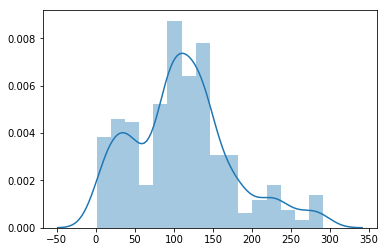

In [174]:
x = np.random.normal(size=100)
print(df['DMC'].tolist())
sns.distplot(df['DMC'].tolist());

In [175]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.667311,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.312243,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [176]:
print("Mean")
print(df.mean())
print("Median")
print(df.median())

Mean
X         4.667311
Y         4.299807
FFMC     90.644681
DMC     110.872340
DC      547.940039
ISI       9.021663
temp     18.889168
RH       44.288201
wind      4.017602
rain      0.021663
area     12.847292
dtype: float64
Median
X         4.00
Y         4.00
FFMC     91.60
DMC     108.30
DC      664.20
ISI       8.40
temp     19.30
RH       42.00
wind      4.00
rain      0.00
area      0.52
dtype: float64


In [177]:
def getQuantileRange(df, col):
    for quantile in np.arange(1, 0.89, -0.01):
        maxQuantile = df[col].quantile(quantile)
        df2 = df[df[col] <= maxQuantile]
        print(df2[col].median() - df2[col].mean(), maxQuantile)
getQuantileRange(df, 'DMC')

-2.5723404255319195 291.3
-0.47201565557730873 286.83199999999994
0.9003952569170082 275.5
0.31956087824352153 258.53999999999985
0.6157999999999788 248.40000000000003
3.038223140495859 231.09999999999997
1.269715447154482 231.1
3.1752598752598686 222.4
3.301467505241078 217.7
4.293446088794937 207.0
6.022150537634417 195.17999999999995


#### From the difference, we can deduce that for quantile = 0.97, difference between mean and median is minimum

In [178]:
def reduceByQuantile(df, col, quantile):
    maxQuantile = df[col].quantile(quantile)
    df2 = df[df[col] <= maxQuantile]
    print(df2[col].median() - df2[col].mean(), maxQuantile)
    return df2
df2 = reduceByQuantile(df, 'DMC', 0.97)

0.31956087824352153 258.53999999999985


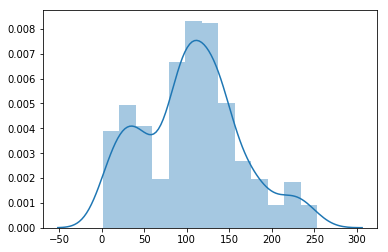

In [179]:
sns.distplot(df2['DMC'].tolist());

In [180]:
df2.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,4.660679,4.299401,90.657685,105.480439,538.844112,9.089022,18.935130,43.822355,3.993413,0.022355,12.966248
std,2.307516,1.241845,5.603842,57.352414,246.605456,4.609978,5.833421,16.116649,1.787819,0.300631,64.592905
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,56.700000,430.800000,6.500000,15.600000,32.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.700000,105.800000,658.200000,8.400000,19.300000,41.000000,4.000000,0.000000,0.470000
75%,7.000000,5.000000,92.900000,139.400000,706.400000,11.000000,22.900000,53.000000,4.900000,0.000000,6.440000
max,9.000000,9.000000,96.200000,253.600000,822.800000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [181]:
def normalize(df, col):
    maxVal, minVal = df[col].max(), df[col].min()
    return (df[col] - minVal) / (maxVal - minVal)

In [182]:
cols = ["DMC", "DC", "ISI", "temp", "RH", "wind", "area", "rain", "area"]
for col in cols:
    df2[col] = normalize(df3, col)
df3.head()

C:\ProgramData\Miniconda3\envs\exp1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,6,5,mar,fri,86.2,0.099406,0.106025,0.090909,0.197368,0.423529,0.700000,0.00000,0.0
1,7,4,oct,tue,90.6,0.135842,0.811388,0.119430,0.519737,0.211765,0.055556,0.00000,0.0
2,7,4,oct,sat,90.6,0.168713,0.833231,0.119430,0.407895,0.211765,0.100000,0.00000,0.0
3,8,6,mar,fri,91.7,0.127525,0.085409,0.160428,0.200658,0.964706,0.400000,0.03125,0.0
4,8,6,mar,sun,89.3,0.198812,0.115720,0.171123,0.302632,0.988235,0.155556,0.00000,0.0


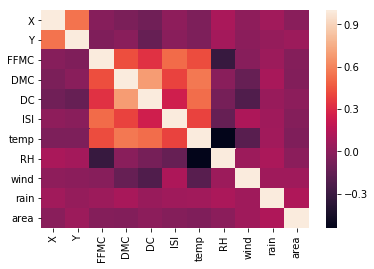

In [183]:
corr = df2.corr()
sns.heatmap(corr)

In [184]:
df2.columns
df3 = df2[[col for col in df3.columns if col not in ['X', 'Y', 'rain']]]

In [185]:
df4.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,mar,fri,86.2,0.099406,0.106025,0.090909,0.197368,0.423529,0.700000,0.0
1,oct,tue,90.6,0.135842,0.811388,0.119430,0.519737,0.211765,0.055556,0.0
2,oct,sat,90.6,0.168713,0.833231,0.119430,0.407895,0.211765,0.100000,0.0
3,mar,fri,91.7,0.127525,0.085409,0.160428,0.200658,0.964706,0.400000,0.0
4,mar,sun,89.3,0.198812,0.115720,0.171123,0.302632,0.988235,0.155556,0.0


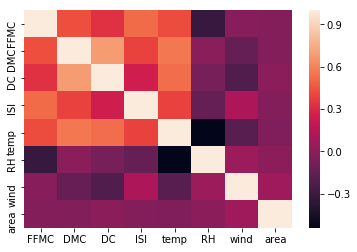

In [186]:
corr = df3.corr()
sns.heatmap(corr)

In [187]:
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,area
FFMC,1.000000,0.432211,0.332235,0.522548,0.426720,-0.315466,-0.014890,-0.025189
DMC,0.432211,1.000000,0.687397,0.393698,0.560881,-0.006397,-0.136218,-0.031551
DC,0.332235,0.687397,1.000000,0.248900,0.525079,-0.073655,-0.217472,0.002949
ISI,0.522548,0.393698,0.248900,1.000000,0.397324,-0.137168,0.116123,-0.028123
temp,0.426720,0.560881,0.525079,0.397324,1.000000,-0.541022,-0.189133,-0.047009
RH,-0.315466,-0.006397,-0.073655,-0.137168,-0.541022,1.000000,0.055292,-0.000460
wind,-0.014890,-0.136218,-0.217472,0.116123,-0.189133,0.055292,1.000000,0.071579
area,-0.025189,-0.031551,0.002949,-0.028123,-0.047009,-0.000460,0.071579,1.000000


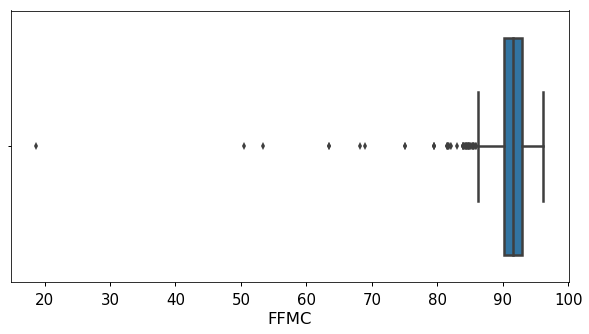

In [209]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
columns = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "area", "rain", "area"]
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df[col], ax = ax)